In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pylab as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from math import sqrt

## Задача 1. 

Поиграемся с датасетом про диабет (он совсем легкий). 

In [2]:
data = pd.read_csv('Diabetes Binary Classification.csv')
data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Целевая переменная тут явно обозначена как Class variable (очевидно, есть у человека диабет или нет)

In [3]:
X = data.drop(columns=['Class variable (0 or 1)'])
y = data['Class variable (0 or 1)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=179)

In [4]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       439
           1       0.59      0.73      0.65       175

    accuracy                           0.78       614
   macro avg       0.74      0.77      0.75       614
weighted avg       0.80      0.78      0.79       614
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       110
           1       0.54      0.64      0.58        44

    accuracy                           0.74       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.76      0.74      0.75       154



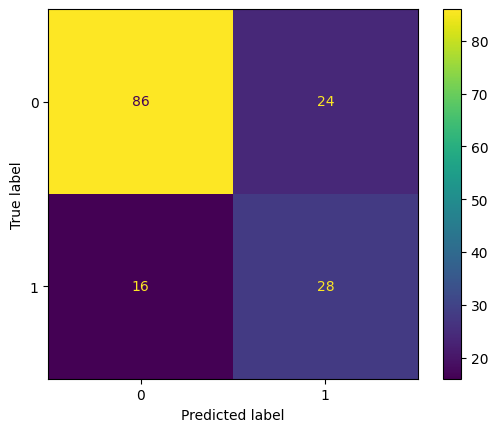

In [5]:
cm = confusion_matrix(ypred_test, y_test)
ConfusionMatrixDisplay(cm).plot()

In [6]:
pipe1 = Pipeline([('scaler', StandardScaler()), ('model', SVC())])
pipe1.fit(X_train, y_train)
ypred_train = pipe1.predict(X_train)
ypred_test = pipe1.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       446
           1       0.64      0.83      0.72       168

    accuracy                           0.83       614
   macro avg       0.79      0.83      0.80       614
weighted avg       0.85      0.83      0.83       614
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       108
           1       0.60      0.67      0.63        46

    accuracy                           0.77       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.78      0.77      0.77       154



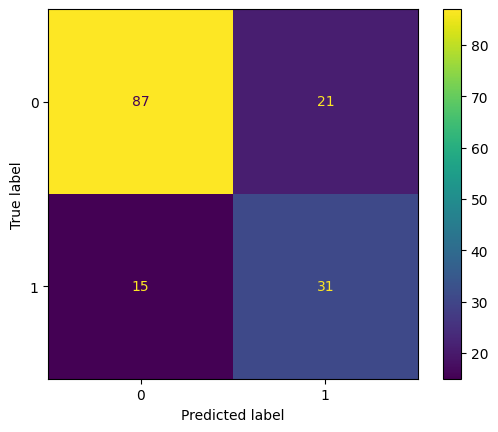

In [7]:
cm = confusion_matrix(ypred_test, y_test)
ConfusionMatrixDisplay(cm).plot()

## Задача 2. 

Второй датасет - про покупателей велосипедов. 

In [8]:
data = pd.read_csv('bike_buyers_clean.csv')
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


Пытаемся по характеристикам человека понять, купит он велик или нет. 

In [9]:
data.drop(columns='ID', inplace=True)
data['Gender'] = data['Gender'].apply(lambda x: 0 if x == 'Male' else 1)
data['Marital Status'] = data['Marital Status'].apply(lambda x: 0 if x == 'Single' else 1)
data['Home Owner'] = data['Home Owner'].apply(lambda x: 0 if x == 'No' else 1)
data['Purchased Bike'] = data['Purchased Bike'].apply(lambda x: 0 if x == 'No' else 1)
data['Commute Distance'] = data['Commute Distance'].apply(lambda x: 0 if x == '0-1 Miles' else
                                                          (1 if x == '1-2 Miles' else
                                                           (2 if x == '2-5 Miles' else
                                                            (3 if x == '5-10 Miles' else 4))))
data = pd.get_dummies(data, columns=['Education', 'Occupation', 'Region'], drop_first=True)
data.head()

,Marital Status,Gender,Income,Children,Home Owner,Cars,Commute Distance,Age,Purchased Bike,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Region_North America,Region_Pacific
0,1,1,40000,1,1,0,0,42,0,0,0,0,0,0,0,0,1,0,0
1,1,0,30000,3,1,1,0,43,0,0,0,1,0,0,0,0,0,0,0
2,1,0,80000,5,0,2,2,60,0,0,0,1,0,0,0,1,0,0,0
3,0,0,70000,0,1,1,3,41,1,0,0,0,0,0,0,1,0,0,1
4,0,0,30000,0,0,0,0,36,1,0,0,0,0,0,0,0,0,0,0


In [10]:
X = data.drop(columns=['Purchased Bike'])
y = data['Purchased Bike']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=179)

In [11]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       429
           1       0.62      0.65      0.64       371

    accuracy                           0.66       800
   macro avg       0.66      0.66      0.66       800
weighted avg       0.66      0.66      0.66       800
               precision    recall  f1-score   support

           0       0.58      0.68      0.63        92
           1       0.68      0.58      0.63       108

    accuracy                           0.63       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.64      0.63      0.63       200



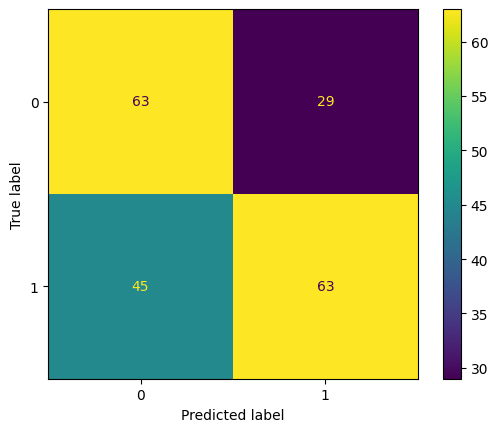

In [12]:
cm = confusion_matrix(ypred_test, y_test)
ConfusionMatrixDisplay(cm).plot()

In [13]:
pipe1 = Pipeline([('scaler', StandardScaler()), ('model', SVC())])
pipe1.fit(X_train, y_train)
ypred_train = pipe1.predict(X_train)
ypred_test = pipe1.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       439
           1       0.74      0.80      0.77       361

    accuracy                           0.78       800
   macro avg       0.78      0.78      0.78       800
weighted avg       0.78      0.78      0.78       800
               precision    recall  f1-score   support

           0       0.61      0.67      0.64        99
           1       0.64      0.58      0.61       101

    accuracy                           0.62       200
   macro avg       0.63      0.63      0.62       200
weighted avg       0.63      0.62      0.62       200



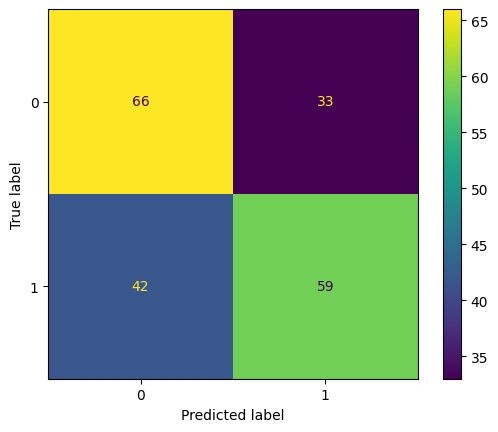

In [14]:
cm = confusion_matrix(ypred_test, y_test)
ConfusionMatrixDisplay(cm).plot()